In [1]:
import json
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
sns.set()

In [2]:
'''
moderator names and IDs
'''
names = (
'mod1',
'mod2',
'mod3',
'mod4',
'mod5',
'mod6',
'mod7',
'mod8',
'mod9',
'mod10',
'mod11',
'mod12',
'mod13',
'mod14',
)
ids = (
'1234567890',
'2132132132',
'7354635466',
'4563721475',
'4153462745',
'2345234667',
'3524652654',
'2453623456',
'2345623453',
'1234231512',
'1324231541',
'1324543266',
'1534479678',
'5347665499',
)

In [3]:
'''
Setting up data
'''
data = {}
months = ('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec')
years = ('19', '20')
times = []

for year in ('18', '19','20'):
    for month in months:
        data[month+year] = [0] * len(ids)
        times.append(month+year)

for line in open('cases_other_bot.json', 'r'):
    js = json.loads(line)
    time = datetime.fromtimestamp(int(js['timestamp']['$numberLong'])//1000).timetuple()
    id_ = js['mod']
    if id_ in ids:
        data[months[time.tm_mon-1] + str(time.tm_year-2000)][ids.index(id_)] += 1

for js in json.load(open('cases_dyno.json', 'r', encoding = 'utf-8'))['logs']: # for dyno
    time = js['createdAt'].split(', ')
    if 'mod' in js:
        id_ = js['mod']['id']
        if id_ in ids:
            data[time[1][:3].lower() + str(int(time[2][:4]) - 2000)][ids.index(id_)] += 1

df = pd.DataFrame(data)
df.index = names
df = df[df.columns[times.index('may18') : times.index('jul20')]]

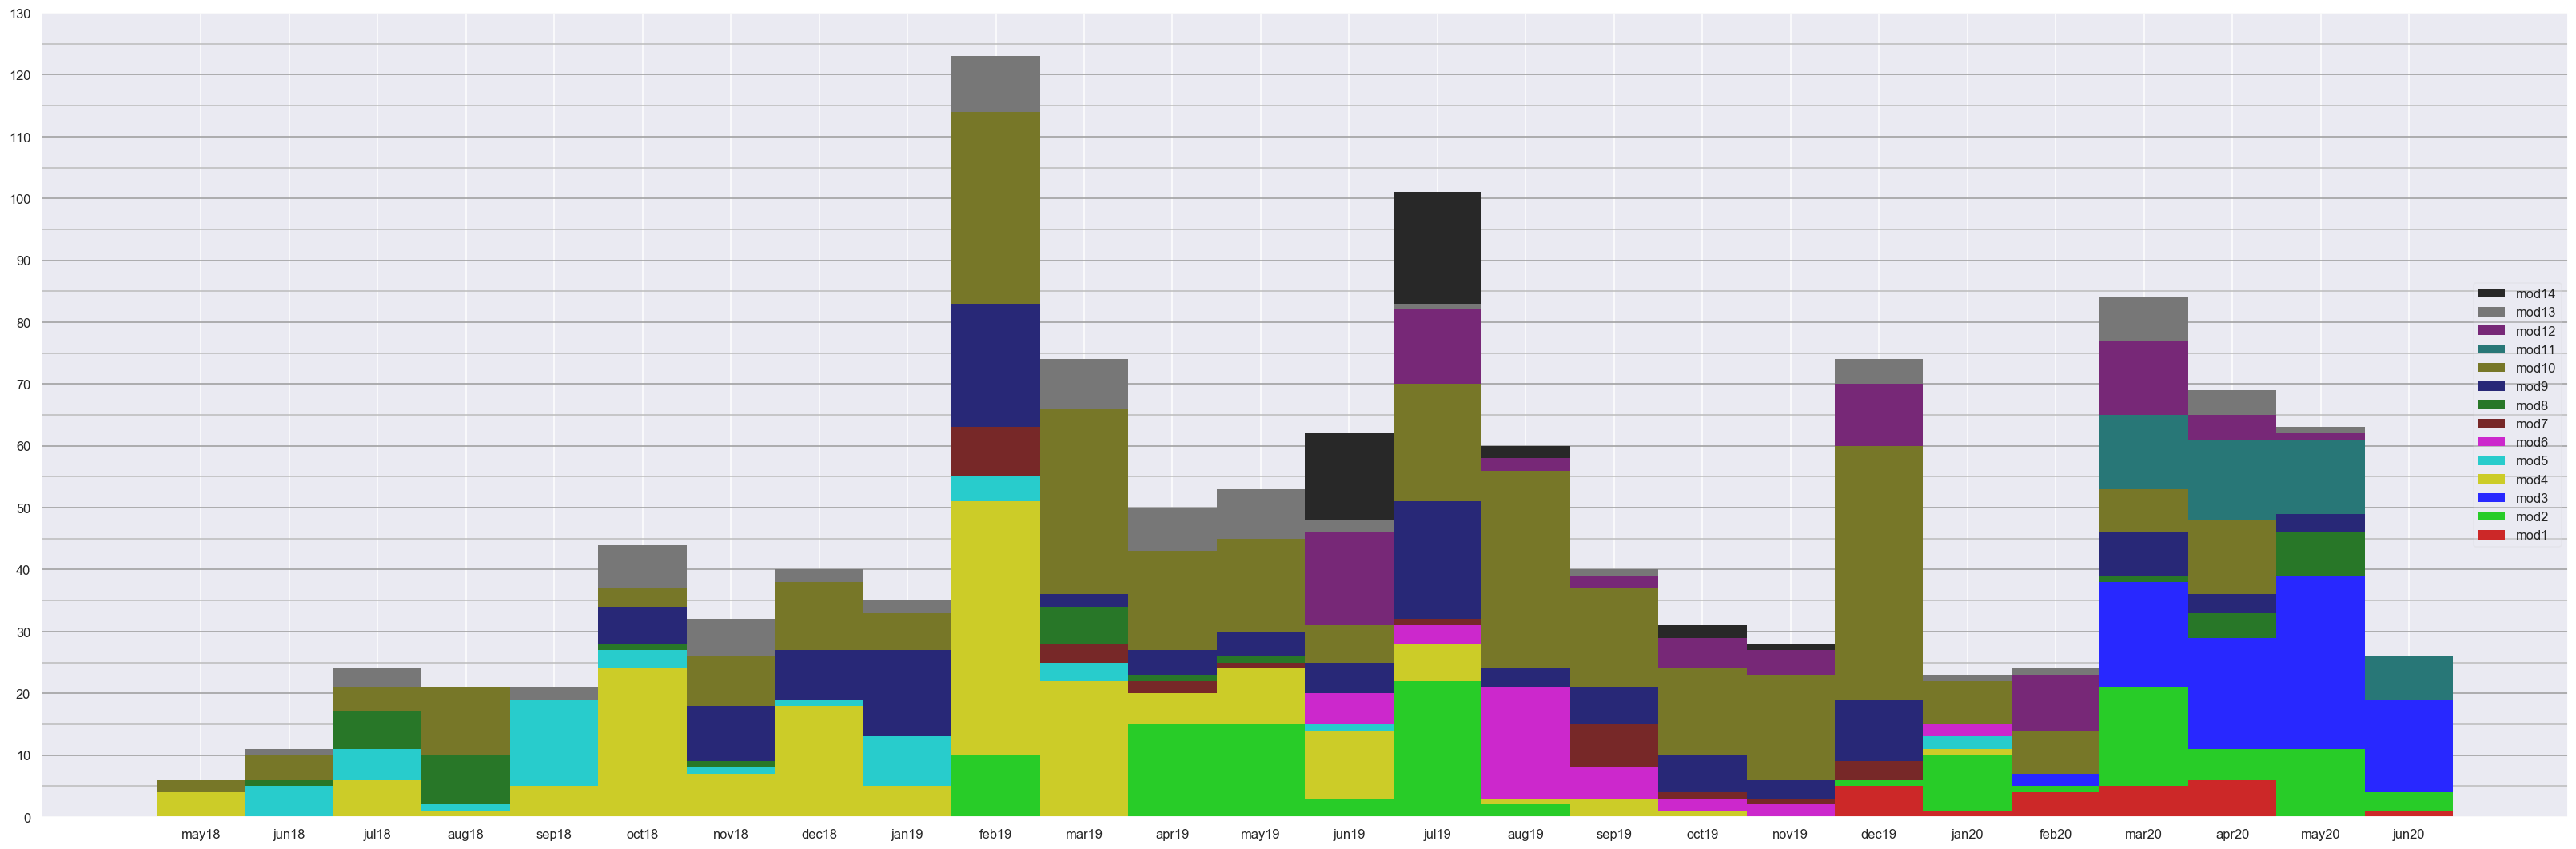

In [4]:
'''
Barplot
'''
dfg, ax = plt.subplots(figsize = (30, 10), dpi = 1080//10)
bottom = [0] * len(df.columns)
for name, color in zip(names, ('#cc2828','#28cc28','#2828ff','#cccc28','#28cccc','#cc28cc','#772828','#287728','#282877','#777728','#287777','#772877', '#777777', '#282828')):
    ax.bar(df.columns, df.loc[name], bottom = bottom, label = name, width = 1, edgecolor='none', color = color)
    bottom += df.loc[name]
plt.legend(names)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='right', framealpha=0.2)

plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 140, 10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.grid(True, axis = 'y', color = '#999999')
ax.grid(True, axis = 'y', which = 'minor', color = '#bbbbbb')
plt.tight_layout()
plt.savefig('moderating.png')
pass

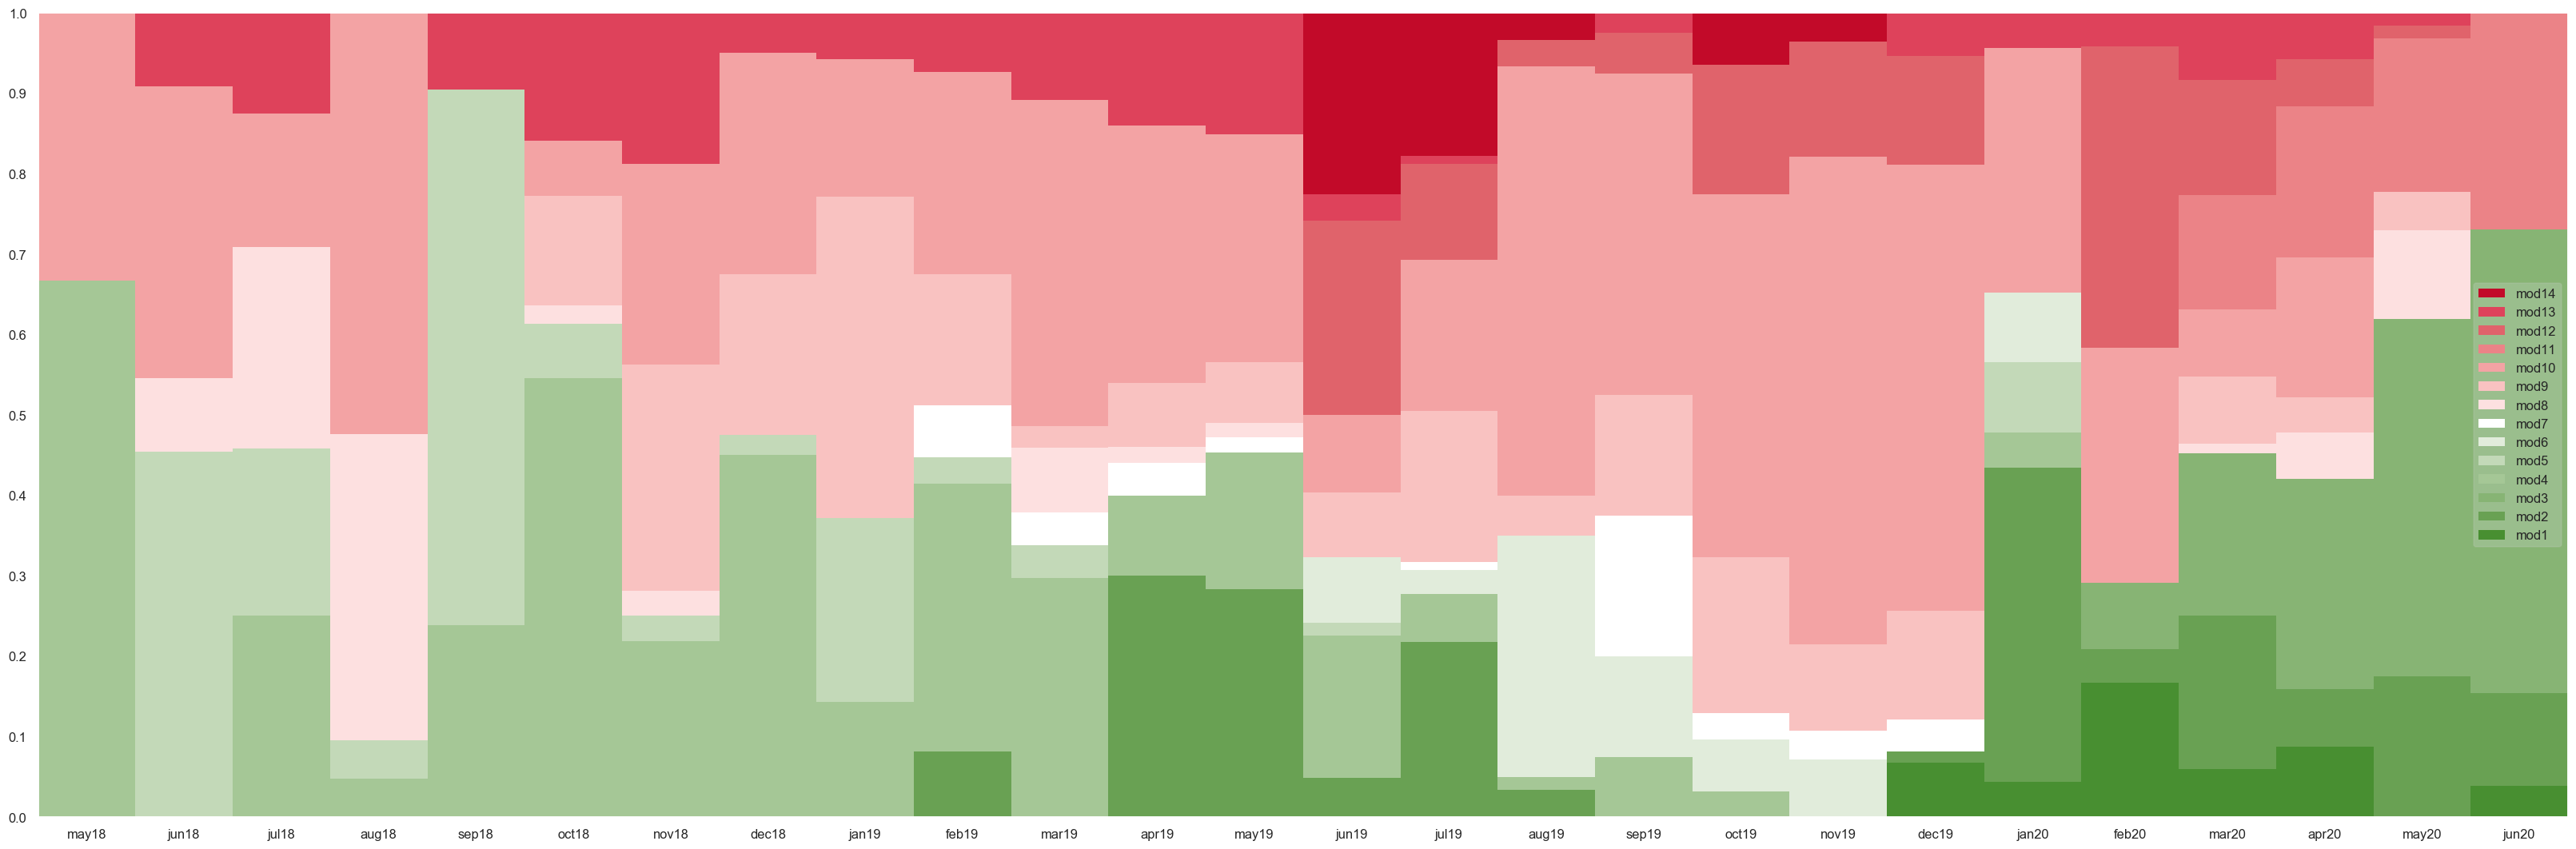

In [5]:
'''
Normalized bar plot
'''
fig, ax = plt.subplots(figsize = (30, 10), dpi = 1080//10)
bottom = [0] * len(df.columns)

for name, color in zip(names, ('#488f31','#69a153','#87b474','#a5c796','#c3d9b8','#e1ecdb','#ffffff','#fde0e0','#f9c2c1','#f3a3a4','#eb8387','#e0636b','#de425b','#c20a29')):
    ax.bar(df.columns, (df / df.sum(0)).loc[name], bottom = bottom, label = name, width = 1, edgecolor='none', color = color)
    bottom += (df / df.sum(0)).loc[name]
    
plt.legend(names)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='right', framealpha=0.2)
plt.tight_layout()
plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 1.1, 0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.grid(True, axis = 'y', color = '#999999')
ax.grid(True, axis = 'y', which = 'minor', color = '#bbbbbb')
ax.grid(0, which = 'both')
plt.xlim(-.5, 25.5)
plt.savefig('moderating.png')
pass

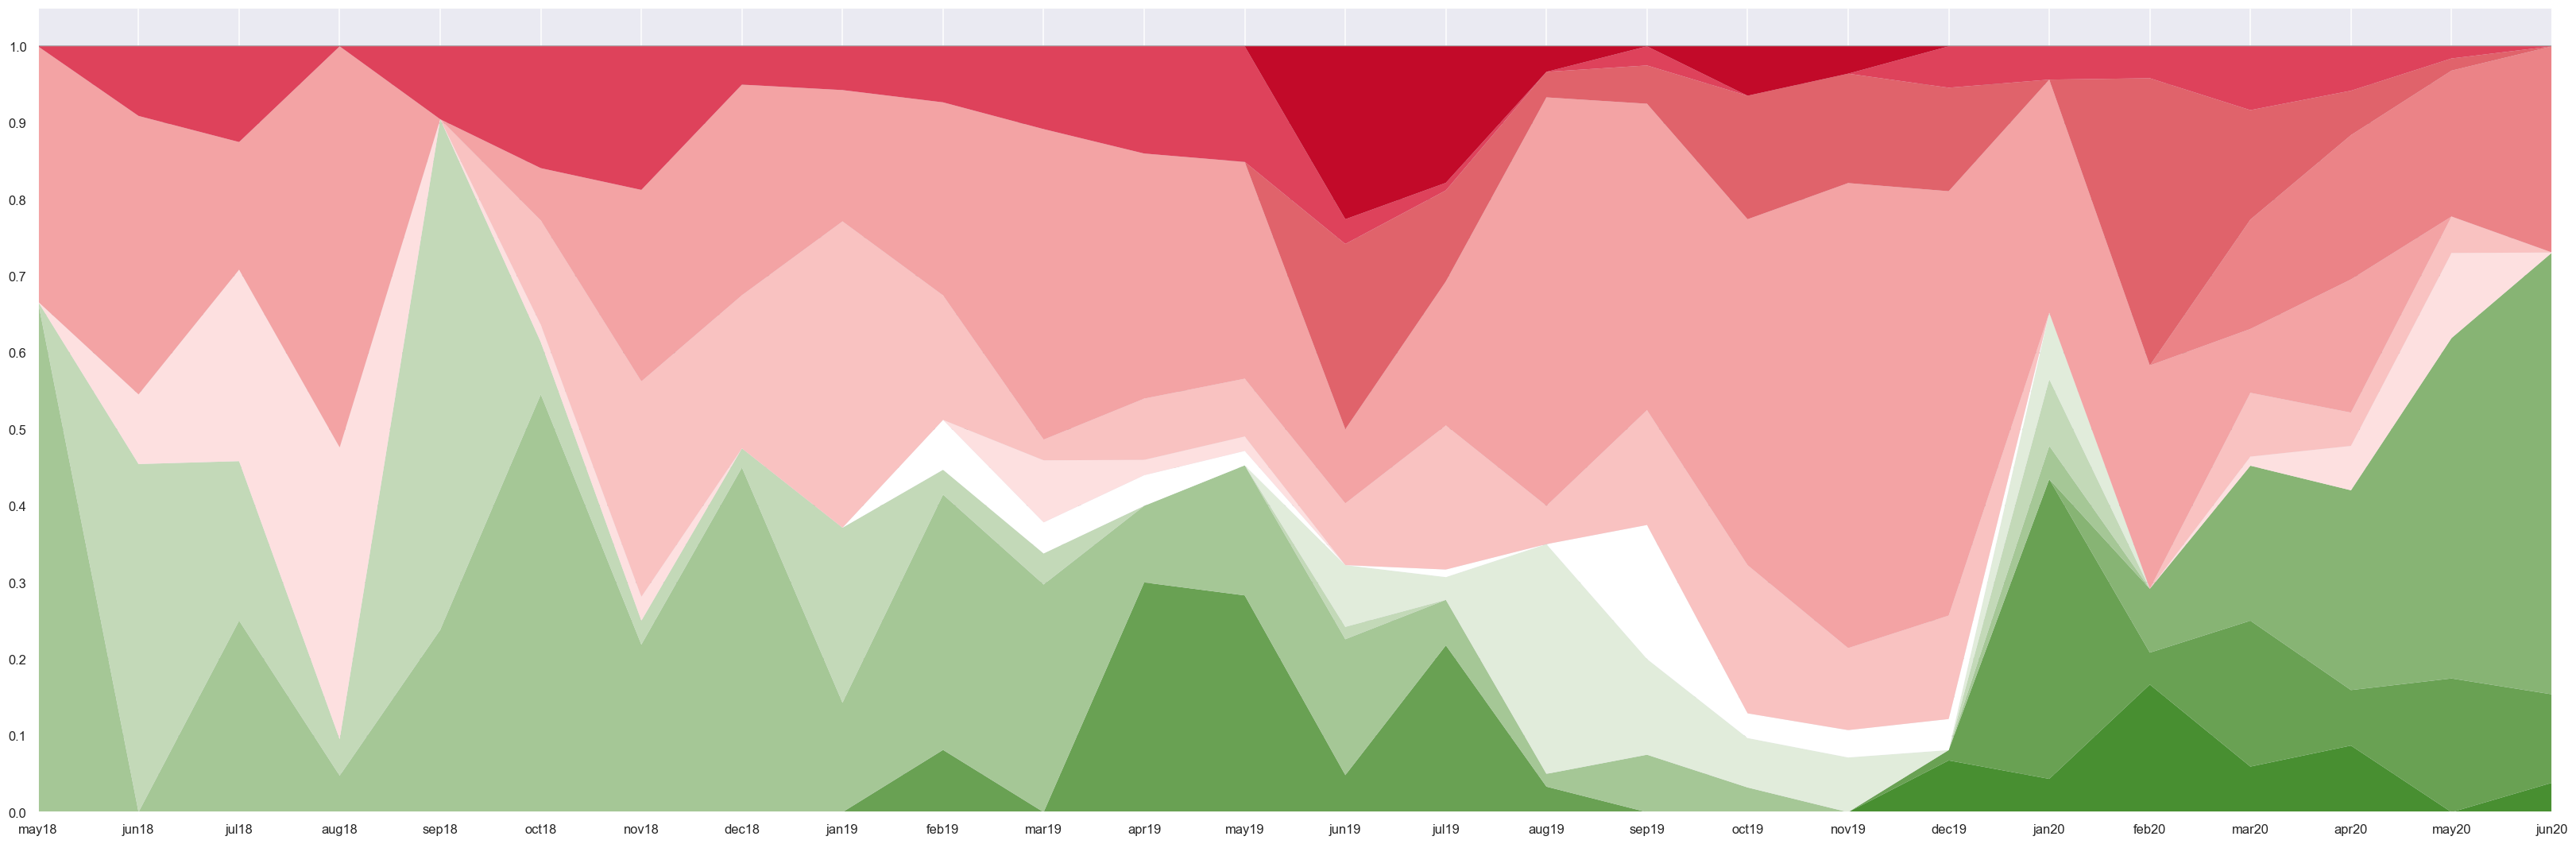

In [6]:
'''
Normalized stack plot
'''
fig, ax = plt.subplots(figsize = (30, 10), dpi = 1080//10)
bottom = [0] * len(df.columns)

plt.stackplot(df.columns, df / df.sum(0),
              edgecolor = 'none',
              colors = ('#488f31','#69a153','#87b474','#a5c796','#c3d9b8','#e1ecdb','#ffffff','#fde0e0','#f9c2c1','#f3a3a4','#eb8387','#e0636b','#de425b','#c20a29'))

#plt.legend(names)
handles, labels = ax.get_legend_handles_labels()
plt.tight_layout()
plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 1.1, 0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.grid(True, axis = 'y', color = '#999999')
ax.grid(True, axis = 'y', which = 'minor', color = '#bbbbbb')
plt.xlim(0, 25)
plt.savefig('moderating.png')
pass

In [7]:
'''
Setting up data for cumulative plot
'''
data = {}
days =     [31,   28,  31,   30,    31,  30,   31,   31,    30,  31,   30,   31]
months = ('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec')
years = ('19', '20')
times = []

for year in ('18', '19','20'):
    for midx, month in enumerate(months):
        for day in np.arange(1, days[midx] + 1).astype(str) if month != 'feb' or year != '20' else np.arange(1, 30).astype(str):
            data[month+year+day] = [0] * len(ids)
            times.append(month+year+day)

f = open('cases_BulletBot.json', 'r')
for line in f:
    js = json.loads(line)
    time = datetime.fromtimestamp(int(js['timestamp']['$numberLong'])//1000).timetuple()
    id_ = js['mod']
    if id_ in ids:
        data[months[time.tm_mon-1] + str(time.tm_year-2000) + str(time.tm_mday)][ids.index(id_)] += 1

for js in json.load(open('cases_dyno.json', 'r', encoding = 'utf-8'))['logs']:
    time = js['createdAt'].split(', ')
    if 'mod' in js:
        id_ = js['mod']['id']
        if id_ in ids:
            data[time[1][:3].lower() + str(int(time[2][:4]) - 2000) + time[1][4:]][ids.index(id_)] += 1
            
c_df = pd.DataFrame(data)
c_df.index = names
c_df = c_df[c_df.columns[times.index('may1830') : times.index('may201')]].cumsum(1)

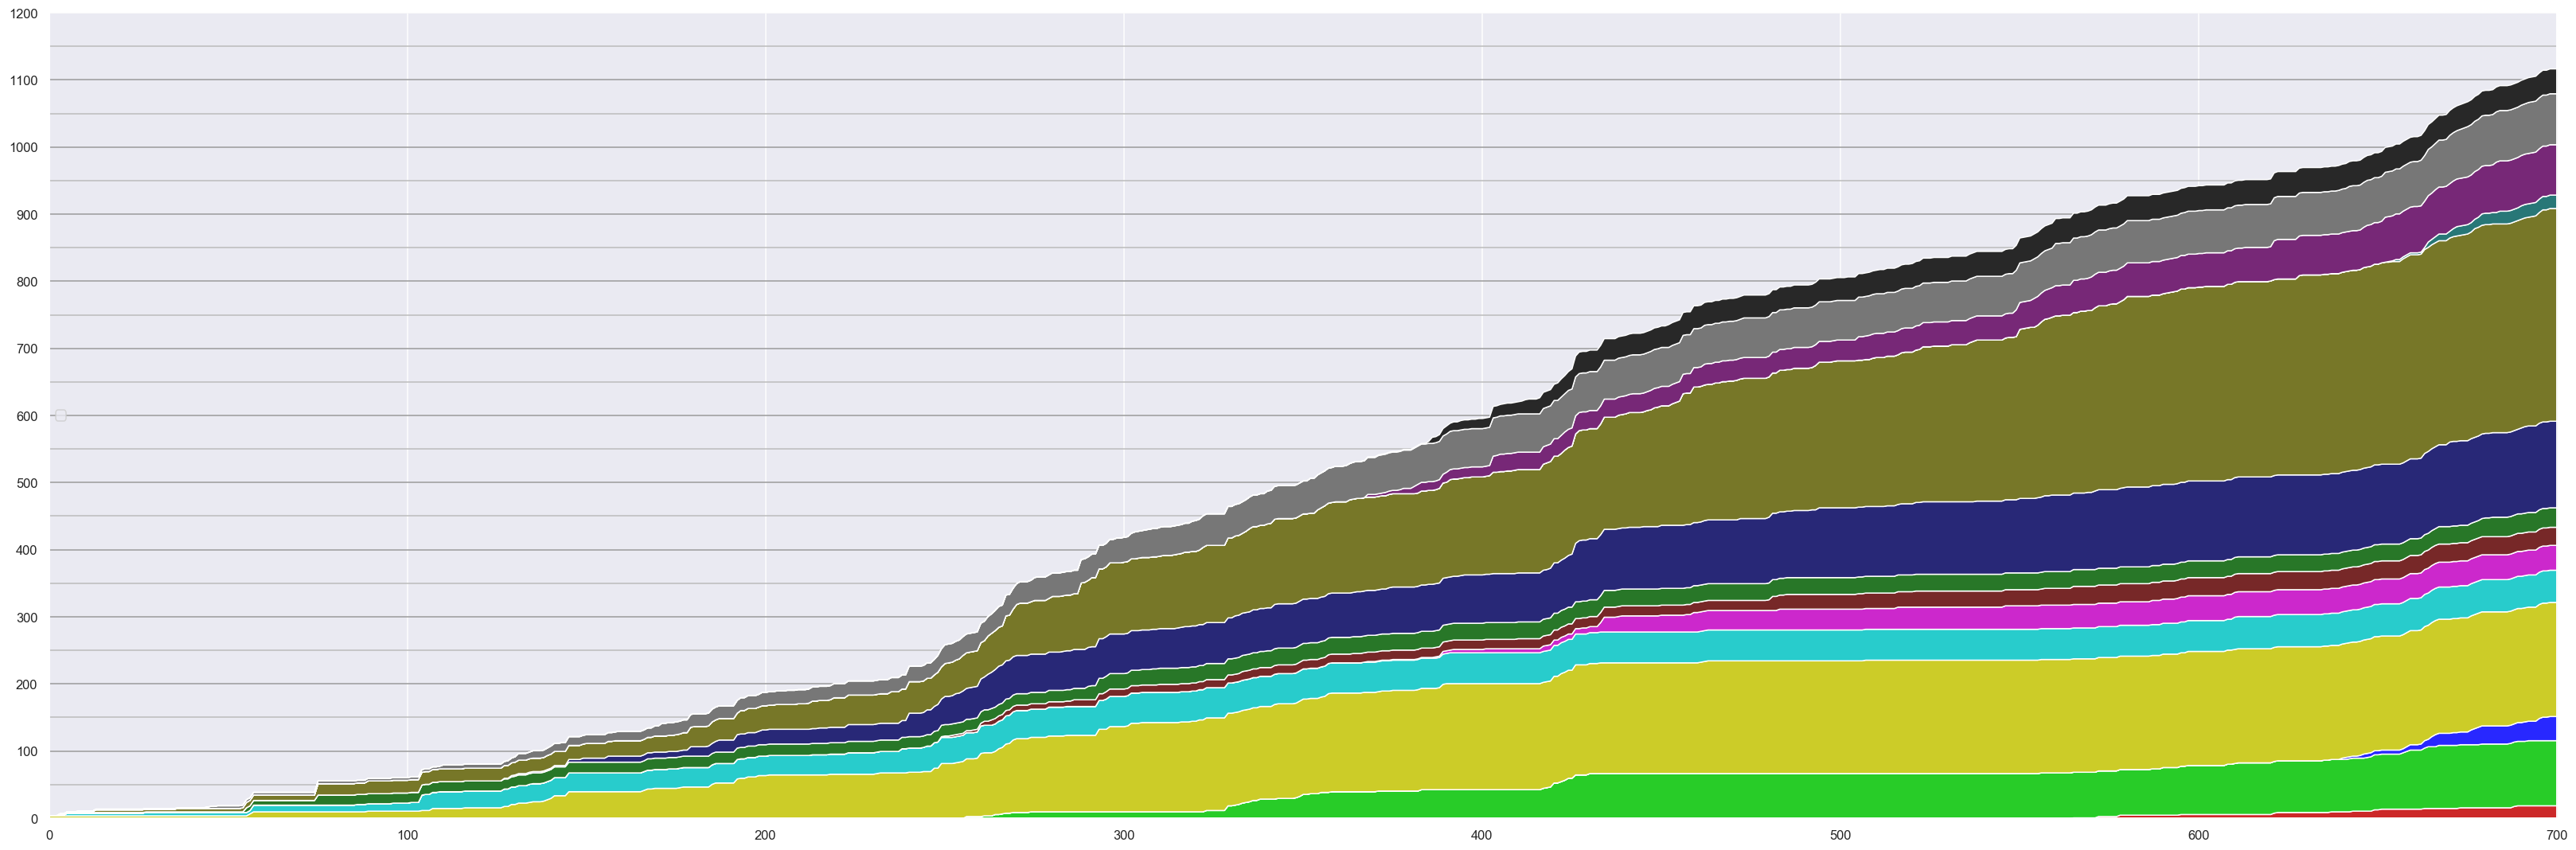

In [8]:
'''
Cumulative plot
'''
fig, ax = plt.subplots(figsize = (30, 10), dpi = 1080//10)
bottom = [0] * len(c_df.columns)

plt.stackplot(np.arange(len(c_df.columns)),
              c_df,
              colors = ('#cc2828','#28cc28','#2828ff','#cccc28','#28cccc','#cc28cc','#772828','#287728','#282877','#777728','#287777','#772877', '#777777', '#282828'))
ax.legend(names)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center left')

plt.tight_layout()
plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 1300, 100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(50))
plt.xlim(0, 700)

ax.grid(True, axis = 'y', color = '#999999')
ax.grid(True, axis = 'y', which = 'minor', color = '#bbbbbb')

plt.savefig('moderating.png')
pass